In [1]:
import pandas as pd
import numpy as np 
%tensorflow_version 1.x
from keras.models import Sequential 
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout 
from keras.utils import np_utils
import tensorflow 
from keras.datasets import fashion_mnist


TensorFlow 1.x selected.


Using TensorFlow backend.


In [2]:
(Xtrain,Ytrain),(Xtest,Ytest)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
print("Training Data =>",Xtrain.shape)
print("Output Data=>",Ytrain.shape)
# np.unique line written so as to identify the number of neurons we need in output layer 
print(np.unique(Ytrain,return_counts=True))
# Shows that the dataset is well balanced 

Training Data => (60000, 28, 28)
Output Data=> (60000,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [4]:
# Converting the Ytrain values in One Hot Notation => Convertion neccessary so that Ytrain has a value for every neuron in the output layer 
# One Option use hot encoding ibuilt function from sklearn 
# Right now I am trying to learn tenssor flow=> using np_utils
Ytrain=np_utils.to_categorical(Ytrain,num_classes=10,dtype='int32')
print("Xtrain shape =>",Xtrain.shape)
print("Ytrain shape =>",Ytrain.shape)

Xtrain shape => (60000, 28, 28)
Ytrain shape => (60000, 10)


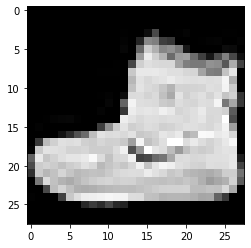

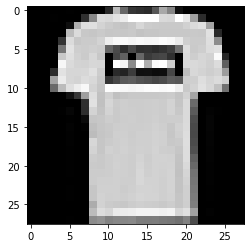

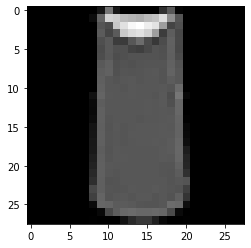

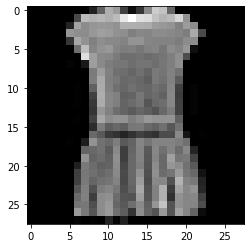

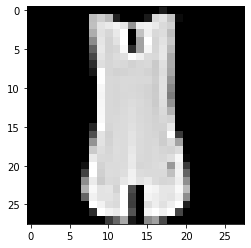

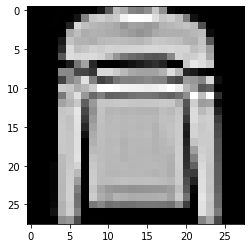

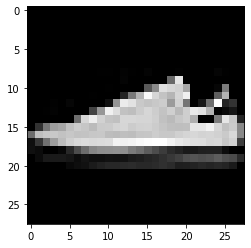

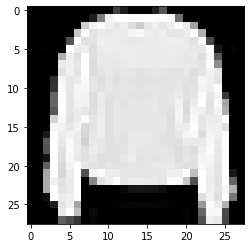

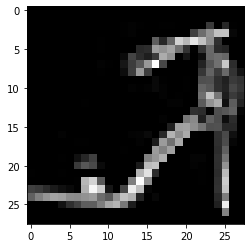

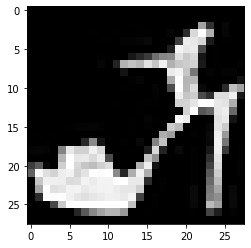

In [5]:
import matplotlib.pyplot as plt
for i in range(10):
  plt.imshow(Xtrain[i],cmap='gray')
  plt.show()

In [6]:
# Buiding Our CNN Model Using KERAS
#Input shape 
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000,)


In [7]:
#We will create a sequntial model
model=Sequential()
model.add(Convolution2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(Convolution2D(filters=8,kernel_size=(5,5),activation='relu') )# line 1
model.add(Flatten()) # This is not a layer it just converts the volume[3D] formed uptil line 1 into 2D form [flatttening ]
model.add(Dense(10,activation='softmax'))
model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 8)           6408      


In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])

In [9]:
# Temporary Solution 
Xtrain=Xtrain.reshape(-1,28,28,1)
hist=model.fit(Xtrain,Ytrain,epochs=4,shuffle=True,batch_size=256,validation_split=0.10)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 54000 samples, validate on 6000 samples
Epoch 1/4





54000/54000 [==============================] - 187s 3ms/step - loss: 2.3593 - acc: 0.1913 - val_loss: 1.7917 - val_acc: 0.3278
Epoch 2/4
54000/54000 [==============================] - 185s 3ms/step - loss: 1.4804 - acc: 0.4542 - val_loss: 1.0379 - val_acc: 0.6710
Epoch 3/4
54000/54000 [==============================] - 186s 3ms/step - loss: 0.7725 - acc: 0.7392 - val_loss: 0.5274 - val_acc: 0.8097
Epoch 4/4
54000/54000 [==============================] - 186s 3ms/step - loss: 0.4547 - acc: 0.8389 - val_loss: 0.4142 - val_acc: 0.8592


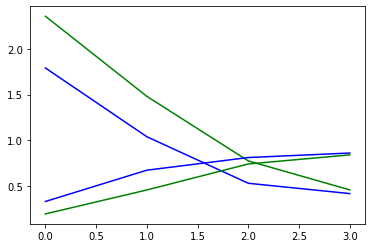

In [10]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.plot(hist.history['acc'],'g')
plt.plot(hist.history['val_acc'],'b')
plt.show()